![Heading](images/Heading3.png)

# Understanding and Visualizing Uncertainty with Error Bars

Error bars are everywhere in scientific figures, but they are often misused or misunderstood.
Choosing the wrong type of error bar or interpreting them incorrectly can lead to misleading conclusions, even when the data are correct.

This tutorial focuses on understanding what error bars actually communicate, not just how to plot them.

#### ⏱ Estimated learning time : 15–20 minutes

#### 🎯 Learning Goals:

By the end of this tutorial, you will be able to:

- Explain the difference between standard deviation and standard error;

- Decide which type of error bar is appropriate for a given situation;

- Create plots with error bars using Matplotlib;

- Interpret overlapping error bars correctly;

- Avoid common misconceptions about uncertainty in plots.

#### ⚙️ What you’ll need:

- Basic familiarity with Python

- A working Jupyter Notebook environment

- Libraries: `matplotlib` and `numpy`

## 1. Simulating repeated measurements

We start with a simple scenario: repeated measurements of the same quantity.

In [24]:
import numpy as np

np.random.seed(42)
measurements = np.random.normal(loc=10, scale=1.5, size=30)

>**💡 Try this:** Change the size parameter. What do you expect will happen to uncertainty?

## 2. Mean and Standard Deviation

The **mean** summarizes the central value.\
The **standard deviation (SD)** describes how spread out the measurements are.

In [25]:
mean = np.mean(measurements)
std = np.std(measurements, ddof=1)

print('Mean =',mean, 'SD =',std)

Mean = 9.717779656223444 SD = 1.350009641103617


## 3. Standard Error of the Mean

The **standard error (SE)** estimates how precisely the mean is known. In other words, it quantifies the uncertainty in your sample mean, showing how close it is to the actual population mean.

$SE=\frac{SD}{\sqrt{N}}$

It's calculated by dividing the sample's standard deviation by the square root of the sample size (N).

In [26]:
se = std / np.sqrt(len(measurements))

print('SE =', se)

SE = 0.2464769110939682


>💡 **Try this:**
Increase the sample size to 100.\
-Does the mean change much?\
-What happens to the standard error?

## 4. SD vs. SE

Before comparing datasets, it’s important to understand what question your plot is answering.

Are you showing:

- how variable your measurements are?
or 
- how precisely you know the mean?

Let's plot the same mean with different error representations.

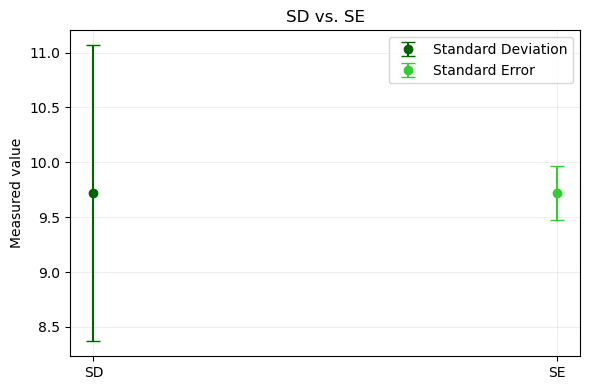

In [27]:
import matplotlib.pyplot as plt

#Create a figure that contains two plots

plt.figure(figsize=(6,4))

plt.errorbar(
    x=1,
    y=mean,
    yerr=std,
    fmt='o',
    color='darkgreen',
    capsize=5,
    label='Standard Deviation'
)

plt.errorbar(
    x=2,
    y=mean,
    yerr=se,
    fmt='o',
    color='limegreen',
    capsize=5,
    label='Standard Error'
)

plt.xticks([1, 2], ['SD', 'SE'])
plt.ylabel('Measured value')
plt.legend()
plt.title('SD vs. SE')
plt.tight_layout()
plt.grid(alpha=0.2)
plt.show()


> **Think about it:**
What story does each error bar tell? \
Use **SD** when your goal is to show data variability\
Use **SE** when your goal is to compare estimated means

![AnatomyErrors](images/AnatomyErrors.png)

## 5. Comparing two datasets

When comparing two datasets, we are usually interested in whether their **mean values differ**.  
For this purpose, standard error is the appropriate choice because it reflects uncertainty in the mean estimate.

Now let’s compare two sets of measurements. 

In [28]:
#Data A and Data B are two different datasets

data_a = np.random.normal(10, 1.5, 30)
data_b = np.random.normal(10.8, 1.5, 30)

#Here store mean, SD and SE for each dataset

mean_a, mean_b = np.mean(data_a), np.mean(data_b)
se_a = np.std(data_a, ddof=1) / np.sqrt(len(data_a))
se_b = np.std(data_b, ddof=1) / np.sqrt(len(data_b))

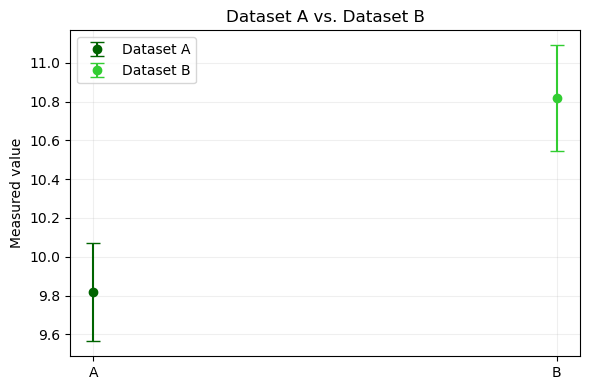

In [30]:
#Visualize the two datasets

plt.figure(figsize=(6,4))

plt.errorbar(1, mean_a, yerr=se_a, fmt='o', color='darkgreen', capsize=5, label='Dataset A')
plt.errorbar(2, mean_b, yerr=se_b, fmt='o', color='limegreen', capsize=5, label='Dataset B')

plt.xticks([1, 2], ['A', 'B'])
plt.ylabel('Measured value')
plt.legend()
plt.title('Dataset A vs. Dataset B')
plt.tight_layout()
plt.grid(alpha=0.2)
plt.show()

#### ⬆️ Interpreting overlapping error bars

When comparing two measurements, a common question is whether their error bars overlap.

However, overlap alone does not tell the full story.  
To interpret it correctly, you need to understand **what the error bars represent**.

In many physics and astrophysics contexts, error bars often correspond to a specific uncertainty level, such as **±1σ or ±2σ**.

If error bars represent ±2σ and overlap, measurements are commonly described as **consistent within 2σ**.  
If they do not overlap, this may suggest tension between the results, depending on the context.


#### 👾 Optional challenge

- Increase the sample size

- Change the measurement noise

- Replot using standard deviation instead of standard error

How does the interpretation change?

## 6.  Summary and Quiz

In this tutorial, you learned:

- To quantify the mean, standard deviation, and standard error, of a sample measurement;

- To select the correct error bars based on what you want to communicate;

- To plot different datasets to compare their consistency.

🧠 Quick Quiz

1. When should you use standard error instead of standard deviation?

2. Does overlapping error bars always mean no meaningful difference?